In [221]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [222]:
df = pd.read_csv('kc_house_data.csv')

In [223]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [182]:
#inspecting the column names
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [183]:
df_feature_cols = df.drop(['id','date'], axis=1)

In [184]:
df_feature_cols.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,3,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,3,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,180000.0,2,1.00,770,10000,1.0,0.0,0.0,3,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,5,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,3,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [185]:
#checking nan values
df.isna().sum()

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

In [186]:
len(df)

21597

In [187]:
df['condition'].unique()

array([3, 5, 4, 1, 2])

In [226]:
#checking to see if there is any correlation between bedrooms, bathrooms and sqft living
df_split = df[['bedrooms','bathrooms','sqft_living']]

In [225]:
df_split.corr()

,bedrooms,bathrooms,sqft_living
bedrooms,1.000000,0.514508,0.578212
bathrooms,0.514508,1.000000,0.755758
sqft_living,0.578212,0.755758,1.000000


In [191]:
df_split2.corr()

,price,sqft_living
price,1.000000,0.701917
sqft_living,0.701917,1.000000


In [192]:
df['waterfront'].unique()

array([nan,  0.,  1.])

In [193]:
df['yr_renovated'].unique()

array([   0., 1991.,   nan, 2002., 2010., 1992., 2013., 1994., 1978.,
       2005., 2003., 1984., 1954., 2014., 2011., 1983., 1945., 1990.,
       1988., 1977., 1981., 1995., 2000., 1999., 1998., 1970., 1989.,
       2004., 1986., 2007., 1987., 2006., 1985., 2001., 1980., 1971.,
       1979., 1997., 1950., 1969., 1948., 2009., 2015., 1974., 2008.,
       1968., 2012., 1963., 1951., 1962., 1953., 1993., 1996., 1955.,
       1982., 1956., 1940., 1976., 1946., 1975., 1964., 1973., 1957.,
       1959., 1960., 1967., 1965., 1934., 1972., 1944., 1958.])

In [194]:
df['yr_renovated'].isna().sum()

3842

In [200]:
df_yr_ren = df[(df['yr_renovated']>0)]

In [203]:
df_yr_ren['yr_renovated'].isna().sum()

0

In [206]:
x_yr_ren = df_yr_ren['yr_renovated']
y = df_yr_ren['price']

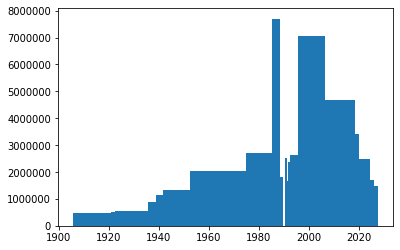

In [227]:
plt.figure()
plt.bar(x_yr_ren,y)
plt.show()

In [92]:
df['grade'].unique()

array([ 7,  6,  8, 11,  9,  5, 10, 12,  4,  3, 13])

In [93]:
df['view'].unique()

array([ 0., nan,  3.,  4.,  2.,  1.])

In [94]:
df['floors'].unique()

array([1. , 2. , 1.5, 3. , 2.5, 3.5])

In [95]:
df['bedrooms'].unique()

array([ 3,  2,  4,  5,  1,  6,  7,  8,  9, 11, 10, 33])

In [96]:
df['bathrooms'].unique()

array([1.  , 2.25, 3.  , 2.  , 4.5 , 1.5 , 2.5 , 1.75, 2.75, 3.25, 4.  ,
       3.5 , 0.75, 4.75, 5.  , 4.25, 3.75, 1.25, 5.25, 6.  , 0.5 , 5.5 ,
       6.75, 5.75, 8.  , 7.5 , 7.75, 6.25, 6.5 ])

In [97]:
df['zipcode'].unique()

array([98178, 98125, 98028, 98136, 98074, 98053, 98003, 98198, 98146,
       98038, 98007, 98115, 98107, 98126, 98019, 98103, 98002, 98133,
       98040, 98092, 98030, 98119, 98112, 98052, 98027, 98117, 98058,
       98001, 98056, 98166, 98023, 98070, 98148, 98105, 98042, 98008,
       98059, 98122, 98144, 98004, 98005, 98034, 98075, 98116, 98010,
       98118, 98199, 98032, 98045, 98102, 98077, 98108, 98168, 98177,
       98065, 98029, 98006, 98109, 98022, 98033, 98155, 98024, 98011,
       98031, 98106, 98072, 98188, 98014, 98055, 98039])

In [98]:
df['date'].max()

'9/9/2014'

In [99]:
df['date'].min()

'1/10/2015'

In [100]:
len (df_feature_cols.columns)

19

In [101]:
df_feature_cols.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15'],
      dtype='object')

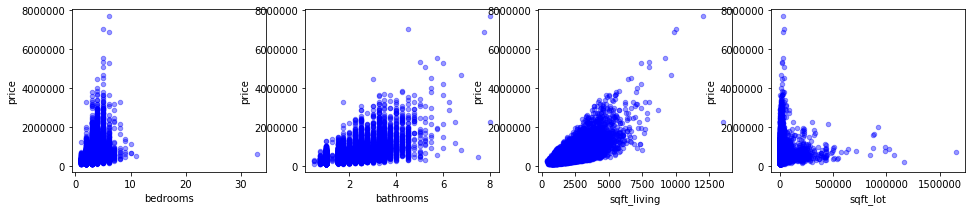

In [102]:
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(16,3))

for xcol, ax in zip(df_feature_cols[['bedrooms','bathrooms','sqft_living','sqft_lot']], axes):
    df.plot(kind='scatter', x=xcol, y='price', ax=ax, alpha=0.4, color='b')

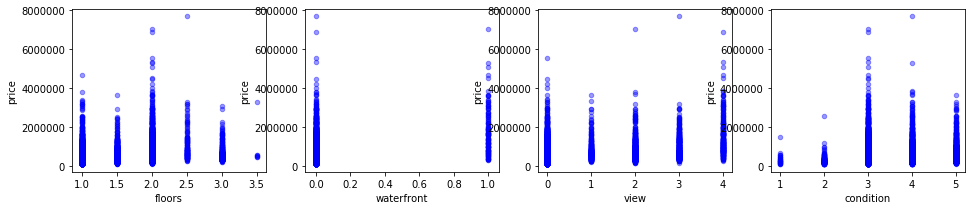

In [103]:
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(16,3))

for xcol, ax in zip(df_feature_cols[['floors','waterfront','view','condition']], axes):
    df.plot(kind='scatter', x=xcol, y='price', ax=ax, alpha=0.4, color='b')

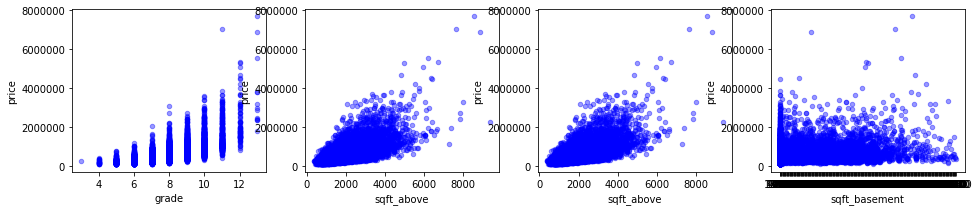

In [104]:
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(16,3))

for xcol, ax in zip(df_feature_cols[['grade','sqft_above','sqft_above','sqft_basement']], axes):
    df.plot(kind='scatter', x=xcol, y='price', ax=ax, alpha=0.4, color='b')

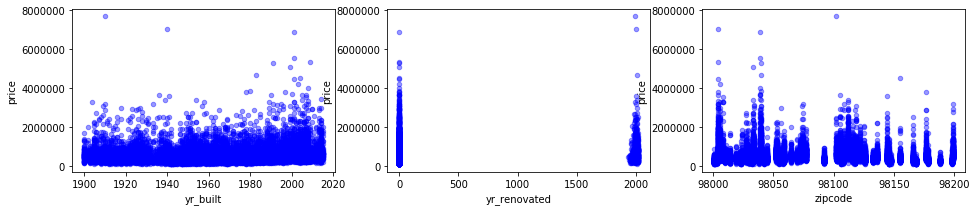

In [105]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(16,3))

for xcol, ax in zip(df_feature_cols[['yr_built', 'yr_renovated', 'zipcode',]], axes):
    df.plot(kind='scatter', x=xcol, y='price', ax=ax, alpha=0.4, color='b')

In [106]:
df['yr_renovated'].unique()

array([   0., 1991.,   nan, 2002., 2010., 1992., 2013., 1994., 1978.,
       2005., 2003., 1984., 1954., 2014., 2011., 1983., 1945., 1990.,
       1988., 1977., 1981., 1995., 2000., 1999., 1998., 1970., 1989.,
       2004., 1986., 2007., 1987., 2006., 1985., 2001., 1980., 1971.,
       1979., 1997., 1950., 1969., 1948., 2009., 2015., 1974., 2008.,
       1968., 2012., 1963., 1951., 1962., 1953., 1993., 1996., 1955.,
       1982., 1956., 1940., 1976., 1946., 1975., 1964., 1973., 1957.,
       1959., 1960., 1967., 1965., 1934., 1972., 1944., 1958.])

In [107]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [ ]:
#this is where i bucketed the grade into smaller sub categories

grade - An index from 1 to 13, where 1-3 falls short of building construction and design, 7 has an average level of construction and design, and 11-13 have a high quality level of construction and design.

In [ ]:
1-3 bad
4-6 below average
7 average
8-10 good
11-13 high

In [123]:
df['grade_cat'] = pd.cut(df['grade'], bins=[0,3,6,7,10,13], labels=['Bad','Below Average','Average','Good','High'])

In [124]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,grade_cat
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650,Average
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639,Average
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062,Below Average
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000,Average
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503,Good


In [125]:
df['grade_cat'] = df['grade_cat'].cat.as_ordered()
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,grade_cat
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650,Average
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639,Average
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062,Below Average
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000,Average
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503,Good


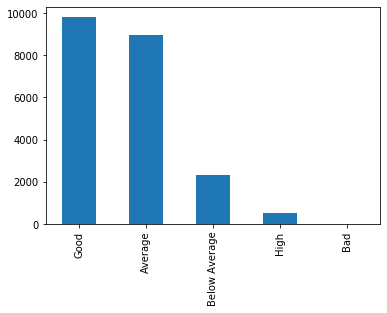

In [127]:
df['grade_cat'].value_counts().plot(kind='bar')

In [128]:
df['grade_cat'] = df['grade_cat'].cat.codes

In [131]:
df_dum = pd.get_dummies(df['grade_cat'], prefix='grade',drop_first=False)

In [132]:
df_dum.head()

,grade_0,grade_1,grade_2,grade_3,grade_4
0,0,0,1,0,0
1,0,0,1,0,0
2,0,1,0,0,0
3,0,0,1,0,0
4,0,0,0,1,0


In [133]:
df = pd.concat([df,df_dum], axis=1)

In [134]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,lat,long,sqft_living15,sqft_lot15,grade_cat,grade_0,grade_1,grade_2,grade_3,grade_4
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,47.5112,-122.257,1340,5650,2,0,0,1,0,0
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,47.7210,-122.319,1690,7639,2,0,0,1,0,0
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,47.7379,-122.233,2720,8062,1,0,1,0,0,0
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,47.5208,-122.393,1360,5000,2,0,0,1,0,0
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,47.6168,-122.045,1800,7503,3,0,0,0,1,0


In [135]:
import statsmodels.api as sm

//anaconda3/lib/python3.7/site-packages/statsmodels/compat/pandas.py:23: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  data_klasses = (pandas.Series, pandas.DataFrame, pandas.Panel)


In [136]:
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15', 'grade_cat', 'grade_0',
       'grade_1', 'grade_2', 'grade_3', 'grade_4'],
      dtype='object')

In [ ]:
#running a practice model with sqft_living, zipcode and grade_cat

In [144]:
X = df[['sqft_living','zipcode','grade_cat']]

In [139]:
y = df['price']

In [145]:
X_const = sm.add_constant(X)
model_sm = sm.OLS(y, X_const)
results = model_sm.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.511
Model:                            OLS   Adj. R-squared:                  0.511
Method:                 Least Squares   F-statistic:                     7513.
Date:                Mon, 23 Mar 2020   Prob (F-statistic):               0.00
Time:                        23:17:31   Log-Likelihood:            -2.9967e+05
No. Observations:               21597   AIC:                         5.994e+05
Df Residuals:                   21593   BIC:                         5.994e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -6.661e+07   3.28e+06    -20.291      0.000    -7.3e+07   -6.02e+07
sqft_living   254.5717      2.507    101.559      0.000     249.658     259.485
zipcode       677.5877     33.458     20.252      0.000     612.007     743.169
grade_cat    6.885e+04   3250.345     21.183      0.000    6.25e+04    7.52e+04
==============================================================================
Omnibus:                    15874.890   Durbin-Watson:                   1.980
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           719925.113
Skew:                           3.064   Prob(JB):                         0.00
Kurtosis:                      30.613   Cond. No.                     1.84e+08
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.84e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
#experimenting with waterfront

In [ ]:
#first dropped the nan values

In [161]:
df_wf_drop = df.dropna(subset=['waterfront'])

In [163]:
df_wf_drop['waterfront'].isna().sum()

0

In [ ]:
#ran a regression to with waterfront and price, to see if there is any explanation, very small r
#squared

In [164]:
X2 = df_wf_drop['waterfront']
y2 = df['price']

In [166]:
X2_const = sm.add_constant(X2)
model_sm = sm.OLS(y2, X2_const)
results = model_sm.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.076
Model:                            OLS   Adj. R-squared:                  0.076
Method:                 Least Squares   F-statistic:                     1588.
Date:                Mon, 23 Mar 2020   Prob (F-statistic):               0.00
Time:                        23:52:15   Log-Likelihood:            -2.7306e+05
No. Observations:               19221   AIC:                         5.461e+05
Df Residuals:                   19219   BIC:                         5.461e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       5.326e+05   2590.404    205.621      0.000    5.28e+05    5.38e+05
waterfront  1.185e+06   2.97e+04     39.855      0.000    1.13e+06    1.24e+06
==============================================================================
Omnibus:                    16093.329   Durbin-Watson:                   1.965
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           894387.382
Skew:                           3.694   Prob(JB):                         0.00
Kurtosis:                      35.591   Cond. No.                         11.5
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
#split out the waterfront with 1

In [167]:
df_wf_1 = df[df['waterfront']==1]

In [168]:
df_wf_1.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,lat,long,sqft_living15,sqft_lot15,grade_cat,grade_0,grade_1,grade_2,grade_3,grade_4
49,822039084,3/11/2015,1350000.0,3,2.50,2753,65005,1.0,1.0,2.0,...,47.4041,-122.451,2680,72513,3,0,0,0,1,0
230,8096000060,4/13/2015,655000.0,2,1.75,1450,15798,2.0,1.0,4.0,...,47.4497,-122.375,2030,13193,2,0,0,1,0,0
246,2025069065,9/29/2014,2400000.0,4,2.50,3650,8354,1.0,1.0,4.0,...,47.6338,-122.072,3120,18841,3,0,0,0,1,0
264,2123039032,10/27/2014,369900.0,1,0.75,760,10079,1.0,1.0,4.0,...,47.4683,-122.438,1230,14267,1,0,1,0,0,0
300,3225069065,6/24/2014,3080000.0,4,5.00,4550,18641,1.0,1.0,4.0,...,47.6053,-122.077,4550,19508,3,0,0,0,1,0


In [ ]:
#checking mean price of properties with waterfront

In [177]:
df_wf_1['price'].mean()

1717214.7260273972

In [ ]:
#checking distribution of properties with waterfront

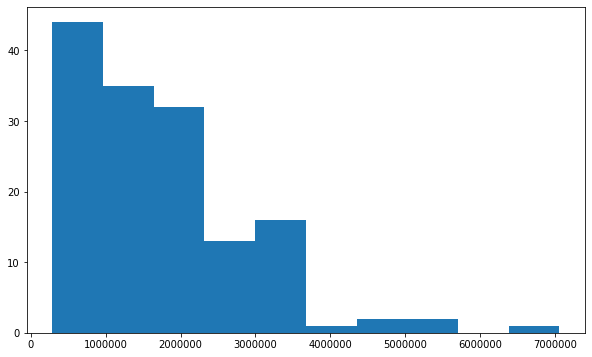

In [210]:
plt.figure(figsize=(10,6))
plt.hist(df_wf_1['price'])
plt.show()

In [ ]:
#number of properties on waterfront, very small

In [212]:
len(df_wf_1)

146

In [228]:
#same with waterfornt 0 
df_wf_0 = df[df['waterfront']==0]

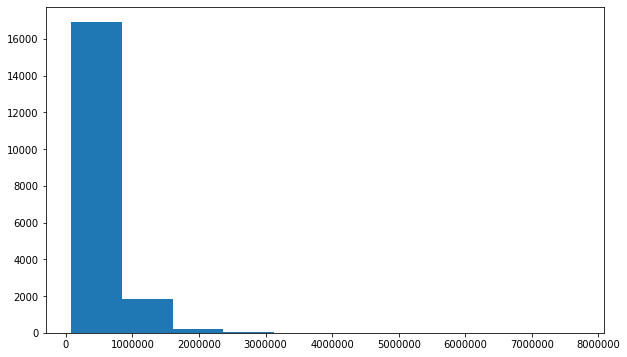

In [229]:
#plotting to see distribution
plt.figure(figsize=(10,6))
plt.hist(df_wf_0['price'])
plt.show()

In [230]:
len(df_wf_0)

19075

In [231]:
df_wf_0['price'].mean()

532641.9866841416

In [232]:
df_wf_0['price'].min()

78000.0

In [ ]:
#checking to see number of zipcodes

In [214]:
df['zipcode'].value_counts()

98103    602
98038    589
98115    583
98052    574
98117    553
        ... 
98102    104
98010    100
98024     80
98148     57
98039     50
Name: zipcode, Length: 70, dtype: int64

In [216]:
len(df['zipcode'].unique())

70

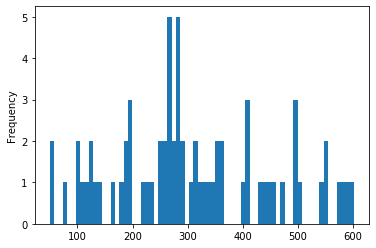

In [217]:
df['zipcode'].value_counts().plot(kind='hist', bins=70)